## About BookCrossing Dataset 
    
    This dataset comprises of 3 tables for users, books and ratings. Explicit ratings are expressed on a scale of 1-10.      

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
import sklearn.metrics as metrics

**Users Dataset

In [66]:
users = pd.read_csv('C:/Users/Samardeep/Desktop/Project/BX-Users.csv', delimiter = ';',error_bad_lines = False , encoding = 'latin1')

In [67]:
print(users.head(),users.shape)

   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN (278858, 3)


In [68]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [69]:
users.loc[(users.Age < 5) | (users.Age > 90) , 'Age'] = np.nan
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int32)

In [70]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


**Books Dataset

In [71]:
books = pd.read_csv('C:/Users/Samardeep/Desktop/Project/BX-Books.csv', delimiter = ';', encoding = 'latin1', error_bad_lines = False)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: Dtyp

In [72]:
print(books.head() , books.shape)

         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/

In [73]:
print(users.shape)

(278858, 3)


**Columns related to images are not required.**  

In [74]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1, inplace = True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [75]:
users.dtypes

User-ID      int64
Location    object
Age          int32
dtype: object

In [76]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [77]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

**The datatype in the Year-Of-Publication column has two values- integer and string. Values in a particular column should only be of a single datatype. Also, there is wrong data entered in certain cells. Example - The value 'DK Publishing Inc' is tallied in the 'Year-Of-Publication' column.**

In [78]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [79]:
books.loc[books.ISBN == '078946697X','Book-Author'] = 'Michael Tietelbaum'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '078946697X','Book-Title'] = 'DK Readers : Creating the X-Men , How it all began '

In [80]:
books.loc[books.ISBN == '0789466953', 'Book-Author'] = 'James Buckley'
books.loc[books.ISBN == '0789466953', 'Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953', 'Publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '0789466953', 'Book-Title'] = 'DK Readers: Creating the X-Men , How Comic Books Come To Life'

In [81]:
books.loc[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [82]:
books.loc[books.ISBN == '2070426769', 'Book-Author'] = 'Jean Marie Gustave le Clezio'
books.loc[books.ISBN == '2070426769', 'Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769', 'Publisher'] = 'Gallimard'
books.loc[books.ISBN == '2070426769', 'Book-Title'] = 'Peuple du ciel, suivi de "Les Bergers"' 

In [83]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [84]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [85]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [86]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'] , errors = 'coerce')

**Number of books with year of publication set as 0.**

In [87]:
books.loc[(books['Year-Of-Publication'] == 0) | (books['Year-Of-Publication'] > 2006) , 'Year-Of-Publication'] = np.NAN
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()) , inplace = True)

In [88]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(np.int32)

In [89]:
books.loc[books.Publisher.isnull(), :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [90]:
books.loc[books.ISBN == '193169656X' , 'Publisher'] = 'other'
books.loc[books.ISBN == '1931696993' , 'Publisher'] = 'other'

**Ratings Dataset

In [91]:
ratings = pd.read_csv('C:/Users/Samardeep/Desktop/Project/BX-Book-Ratings.csv', delimiter = ';', error_bad_lines = False , encoding = 'latin1')
ratings.columns = ['User-ID', 'ISBN', 'book_rating']

In [92]:
print(ratings.head() , ratings.shape)

   User-ID        ISBN  book_rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6 (1149780, 3)


In [93]:
n_users = users.shape[0]
n_books = books.shape[0]
print (n_users * n_books)

75670906880


In [94]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]

In [95]:
sparsity = 1.0 - len(ratings_new)/float(n_users * n_books)
print('The sparsity level of book crossing dataset is {} %'.format(sparsity*100))

The sparsity level of book crossing dataset is 99.99863734155898 %


In [96]:
ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [97]:
ratings_explicit = ratings_new[ratings_new.book_rating != 0]
ratings_implicit = ratings_new[ratings_new.book_rating == 0]

In [98]:
users_exp_rating = users[users['User-ID'].isin(ratings_explicit['User-ID'])]
users_imp_rating = users[users['User-ID'].isin(ratings_implicit['User-ID'])]

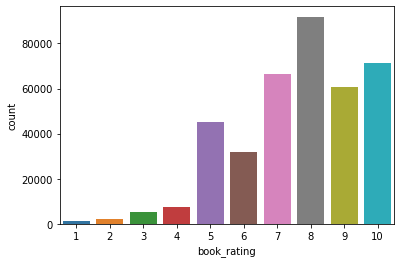

In [99]:
sns.countplot(data = ratings_explicit , x = 'book_rating')
plt.show()

# Collaborative Filtering Based Recommendation System 

To cope up with the computing power of my machine , we are considering users which have rated atleast 100 books and books which have atleast 100 ratings

In [100]:
counts1 = ratings_explicit['User-ID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['User-ID'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['book_rating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['book_rating'].isin(counts[counts >= 100].index)]

**Generating the user-item matrix from the ratings table

In [101]:
ratings_matrix = ratings_explicit.pivot(index = 'User-ID' , columns = 'ISBN' , values = 'book_rating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
print(ratings_matrix.head())

(449, 66574)
ISBN     0000913154  0001046438  000104687X  0001047213  0001047973  \
User-ID                                                               
2033            NaN         NaN         NaN         NaN         NaN   
2110            NaN         NaN         NaN         NaN         NaN   
2276            NaN         NaN         NaN         NaN         NaN   
4017            NaN         NaN         NaN         NaN         NaN   
4385            NaN         NaN         NaN         NaN         NaN   

ISBN     000104799X  0001048082  0001053736  0001053744  0001055607  ...  \
User-ID                                                              ...   
2033            NaN         NaN         NaN         NaN         NaN  ...   
2110            NaN         NaN         NaN         NaN         NaN  ...   
2276            NaN         NaN         NaN         NaN         NaN  ...   
4017            NaN         NaN         NaN         NaN         NaN  ...   
4385            NaN         NaN  

**Converting all the NaN values to 0 as most of the machine learning algorithms cannot handle NaN. 0 in the ratings matrix 
indicates absence of ratings.

In [102]:
ratings_matrix.fillna(0 , inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [103]:
ratings_matrix.head(20)

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
global metric , k
metric = 'cosine'
k = 10

**The function findksimilarusers inputs userID and ratings matrix and returns similarities and indices of k similar users.

In [108]:
def findksimilarusers(user_id , ratings , metric = metric , k=k):
    similarities = []
    indices = []
    model_knn = NearestNeighbors(metric = metric , algorithm = 'brute')
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
           
    return similarities,indices

**The function predict_userbased predicts rating for specified user-item combination based on user-based approach.Predictions are computed as weighted average of deviations from neighbor’s mean and adding it to active user’s mean rating.

In [109]:
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))

    return prediction

In [117]:
predict_userbased(6242,'B0000DYXID',ratings_matrix);


Predicted rating for user 6242 -> item B0000DYXID: 0


In [111]:
def findksimilaritems(item_id, ratings, metric='correlation', k=k):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()

    return similarities,indices

**The function predict_itembased predicts rating for specified user-item combination based on item-based approach.Predictions are computed as weighted average of deviations from neighbor’s mean and adding it to active user’s mean rating.

In [113]:
def predict_itembased(user_id, item_id, ratings, metric = 'correlation', k=k):
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                              
    prediction = int(round(wtd_sum/sum_wt))
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below //code has been validated without the code snippet below, below snippet is to avoid negative
    #predictions which might arise in case of very sparse datasets when using correlation metric
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10

    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))      
    
    return prediction

In [118]:
prediction = predict_itembased(8890,'0001055607',ratings_matrix)


Predicted rating for user 8890 -> item 0001055607: 1
